# Titanic - Exploración de datos

El objetivo del siguiente notebook es hacer una mini-exploración de los datos del Dataset "Titanic.csv".

Pueden encontrar más información al respecto en el siguiente link:

https://www.kaggle.com/c/titanic

Más adelante hablaremos más acerca de Kaggle, pero por ahora les comentamos que es una página donde se suben Dataset y la gente los analiza. En general los datasets están bastante curados y la gente sube los "Kernels" (Notebooks) que usaron para analizarlos. La página está buenísima, recomendamos que exploren los kernels de análisis del Titanic - al menos los de mayor puntaje - y miren las competencias que hay.

## Análisis Exploratorio de Datos

Lo que vamos a hacer ahora se suele llamar EDA en la jerga, que significa Exploratory Data Analisis.

### 1. Cargamos las librerías y los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

Lo que sigue es una función. Python - y cualquier lenguaje de programación en general - nos permite crear funciones que hagan alguna operación en particular que no esté en las librerías.

In [2]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [8]:
#df = pd.read_csv('titanic.csv',delimiter='\t')
df = sns.load_dataset('titanic')
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [7]:
df.ix[df.class, ]

SyntaxError: invalid syntax (<ipython-input-7-ab86c098bca3>, line 1)

Y nos fijamos cuántas columnas y cuántas filas tiene del dataset

In [4]:
print(df.shape)

(891, 15)


Es decir, tiene 1009 entradas y 14 features o variables.

¿Recuerdan lo que hace el comando *.describe()*?¿Y *.info*?

In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [7]:
draw_missing_data_table(df)

,Total,Percent
deck,688,0.772166
age,177,0.198653
embark_town,2,0.002245
embarked,2,0.002245
alone,0,0.000000
alive,0,0.000000
adult_male,0,0.000000
who,0,0.000000
class,0,0.000000
fare,0,0.000000


**Opcional:** reemplazar la columna de género (*sex*) donde figura *male* o *female* por un número. Nos estamos adelantando un poco a la segunda entrega, pero vayamos prestándole atención.

In [8]:
#df.sex = df.sex.map({'male': 0, 'female': 1})
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**El siguiente comando no anda con todas las versiones de Seaborn**. No sabemos por qué por ahora.

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

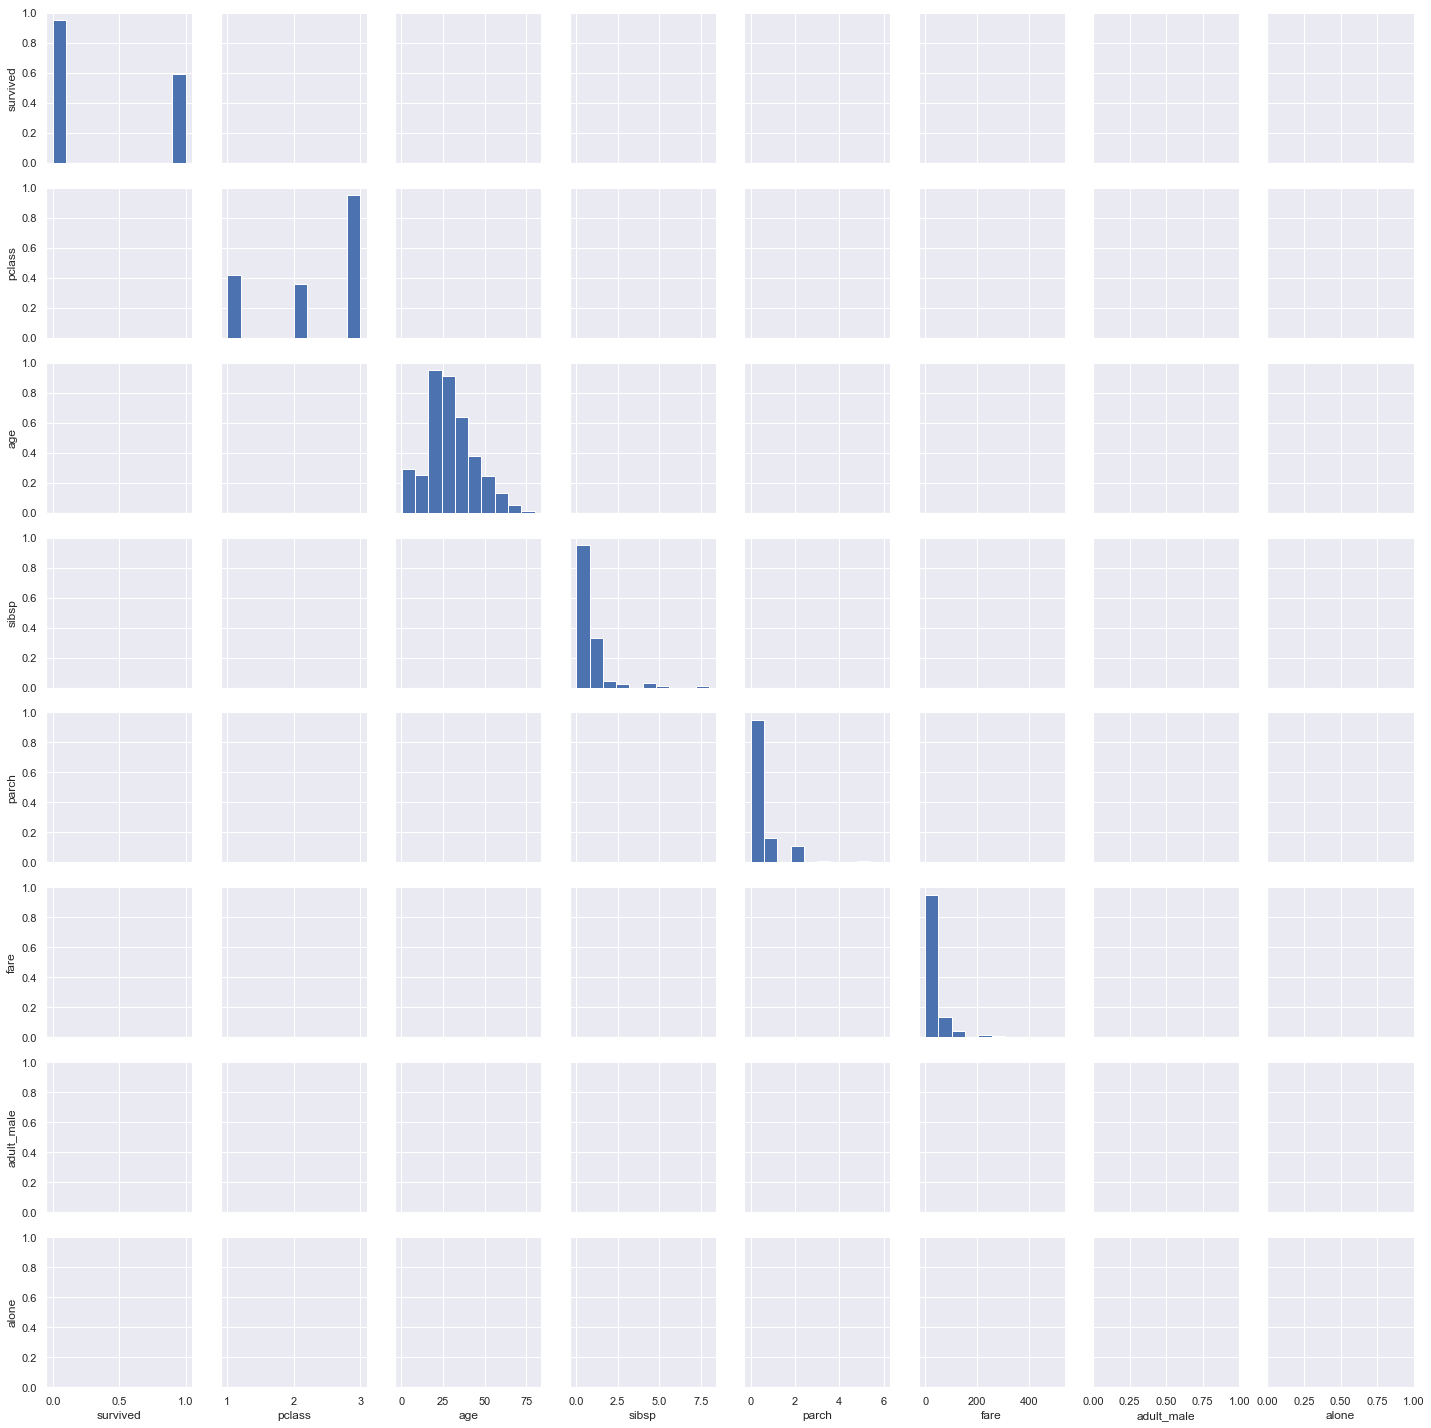

In [11]:
## NO ANDA CON TODAS LAS VERSIONES DE SEABORN
sns.pairplot(df)

### Gráficos

"Mujeres y niños primero". ¿Será cierto? Tratemos de graficar la supervivencia discrimando por edad y género.

1. ¿Cuántas personas sobrevivieron?

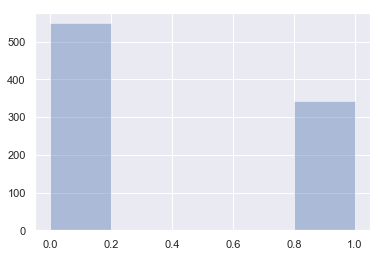

In [12]:
sns.distplot(df.survived.values, kde = False)
plt.show()

2. ¿Podremos separar ese histograma de acuerdo al género de quienes sobrevivieron y quienes no?

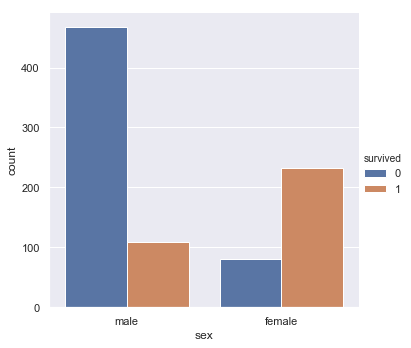

In [13]:
sns.catplot(x="sex", y=None, hue="survived", data=df, kind="count")
plt.show()

**Para Pensar:** ¿Es suficiente ese gráfico para afirmar que las mujeres tenían una probabilidad más alta de supervivencia que los hombres?¿Qué información extra o gráfico agregarían para ello?

3. ¿Y por edad?¿Se podrá hacer algo parecido?

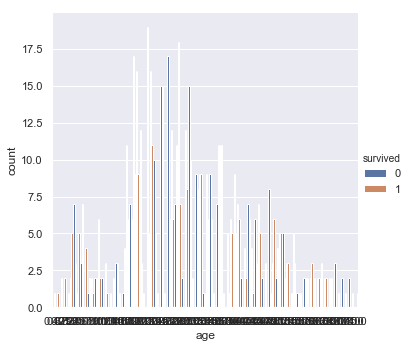

In [14]:
sns.catplot(x="age", y=None, hue="survived", data=df, kind="count")
plt.show()

No queda muy lindo...¿Se podrá hacer mejor?

Hacemos una máscara con los que sobrevivieron

In [16]:
survived_bool = df.survived.values.astype(bool)

Y separamos la variable edad en dos grupos, la edad de los que sobrevivieron y la edad de los que no. Luego, hacemos un histograma para cada uno y lo superponemos.

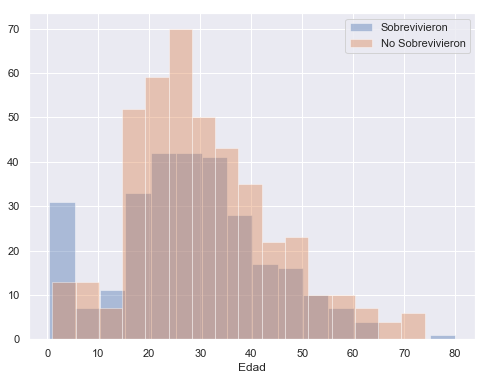

In [17]:
edad_survived = df.age.values[~np.isnan(df.age.values) & survived_bool]
edad_not_survived = df.age.values[~np.isnan(df.age.values) & ~survived_bool]

plt.figure(figsize = (8,6))
sns.distplot(edad_survived, kde = False, label = 'Sobrevivieron')
sns.distplot(edad_not_survived, kde = False, label = 'No Sobrevivieron')
plt.xlabel('Edad')
plt.legend()
plt.show()

Sigue sin ser de lo más ilustrativo. Más adelante veremos cómo mejorar este gráfico. ¿Dirían que las distribuciones son diferentes?

**Ejercicio:** Separar el histograma de edades de las personas que sobrevivieron por género. ¿Agrega información? 

**Ejercicio:** hacer un gráfico similar para la *pclase*. ¿Qué conclusiones sacarían de ese gráfico?

**Para seguir explorando:** Muchas veces sacamos conclusiones con la información que tenemos disponible. Pero cuando no se explora el set de datos completo es posible que existan *confundidores* o correlaciones que no son tales. Recordar: **correlación no implica causalidad**. Explorar la relación *género - clase - supervivencia* y fijarse si pueden agregar algo a las conclusiones del ejercicio anterior.

## Extras: otros tipos de gráficos

1. Gráficos de torta:

In [18]:
bins = [0,3,12,18, 50,200]
edades = df.age.values
edades = edades[~np.isnan(edades)]
cats = pd.cut(edades, bins)

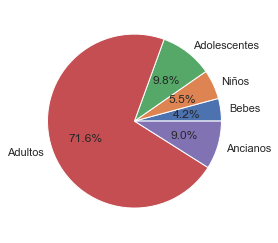

In [19]:
labels = 'Bebes', 'Niños', 'Adolescentes', 'Adultos', 'Ancianos'
_, sizes = np.unique(cats, return_counts=True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

2. Heatmap: